In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("./Data/GlobalLandTemperaturesByCity.csv")
df = df.dropna()

In [4]:
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [5]:
df1 = df.loc[df['City'] == "New York"]

In [6]:
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5203973,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
5203978,1744-04-01,9.788,2.151,New York,United States,40.99N,74.56W
5203979,1744-05-01,15.708,1.506,New York,United States,40.99N,74.56W
5203980,1744-06-01,21.210,1.455,New York,United States,40.99N,74.56W
5203981,1744-07-01,22.207,1.305,New York,United States,40.99N,74.56W


In [7]:
df1.size

21833

In [8]:
data = list(df1.iloc[:,1])

In [9]:
mean = np.mean(np.array(data))
std = np.std(np.array(data))

In [10]:
data1 = (np.array(data) - mean)/std

In [11]:
X = []
Y = []
for i in range(0, len(list(data))-60):# 60 -> 70 if predicting for 20
    X.append(data1[i:i+50])
    Y.append(data1[i+50:i+60])# 60 -> 70 if predicting for 20

In [12]:
X_1 = np.array(X)
Y_1 = np.array(Y)

In [13]:
X_2 = X_1.reshape(X_1.shape[0],50,1)
Y_2 = Y_1.reshape(Y_1.shape[0], 10)# 10 -> 20 if predicting for 20

In [14]:
Y_2.shape

(3059, 10)

In [15]:
n = int(0.3*len(X))
X_train = X_2[:-n]
Y_train = Y_2[:-n]
X_test = X_2[-n:]
Y_test = Y_2[-n:]

In [16]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2142, 50, 1) (2142, 10) (917, 50, 1) (917, 10)


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

/Users/adityadev/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
model = Sequential()
model.add(LSTM(300, input_shape=(50,1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))# 10 -> 20 if predicting for 20

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy', 'mae'])

In [19]:
history = model.fit(X_train, Y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=50, batch_size=30)

Train on 1713 samples, validate on 429 samples
Epoch 1/50
1713/1713 [==============================] - 38s 22ms/step - loss: 1.0084 - acc: 0.1851 - mean_absolute_error: 0.8905 - val_loss: 0.9805 - val_acc: 0.1678 - val_mean_absolute_error: 0.8761
Epoch 2/50
1713/1713 [==============================] - 36s 21ms/step - loss: 1.0020 - acc: 0.1798 - mean_absolute_error: 0.8876 - val_loss: 0.9718 - val_acc: 0.1678 - val_mean_absolute_error: 0.8721
Epoch 3/50
1713/1713 [==============================] - 36s 21ms/step - loss: 0.9936 - acc: 0.1740 - mean_absolute_error: 0.8838 - val_loss: 0.9631 - val_acc: 0.1678 - val_mean_absolute_error: 0.8679
Epoch 4/50
1713/1713 [==============================] - 37s 21ms/step - loss: 0.9839 - acc: 0.1705 - mean_absolute_error: 0.8795 - val_loss: 0.9506 - val_acc: 0.1678 - val_mean_absolute_error: 0.8620
Epoch 5/50
1713/1713 [==============================] - 32s 19ms/step - loss: 0.9731 - acc: 0.1769 - mean_absolute_error: 0.8745 - val_loss: 0.9385 - val

1713/1713 [==============================] - 32s 18ms/step - loss: 0.6450 - acc: 0.6719 - mean_absolute_error: 0.6134 - val_loss: 0.5841 - val_acc: 0.7273 - val_mean_absolute_error: 0.5705
Epoch 42/50
1713/1713 [==============================] - 33s 19ms/step - loss: 0.6443 - acc: 0.6702 - mean_absolute_error: 0.6119 - val_loss: 0.5835 - val_acc: 0.7296 - val_mean_absolute_error: 0.5696
Epoch 43/50
1713/1713 [==============================] - 37s 22ms/step - loss: 0.6437 - acc: 0.6725 - mean_absolute_error: 0.6112 - val_loss: 0.5830 - val_acc: 0.7319 - val_mean_absolute_error: 0.5687
Epoch 44/50
1713/1713 [==============================] - 34s 20ms/step - loss: 0.6429 - acc: 0.6708 - mean_absolute_error: 0.6103 - val_loss: 0.5824 - val_acc: 0.7296 - val_mean_absolute_error: 0.5676
Epoch 45/50
1713/1713 [==============================] - 33s 19ms/step - loss: 0.6424 - acc: 0.6678 - mean_absolute_error: 0.6091 - val_loss: 0.5819 - val_acc: 0.7366 - val_mean_absolute_error: 0.5669
Epoch 4

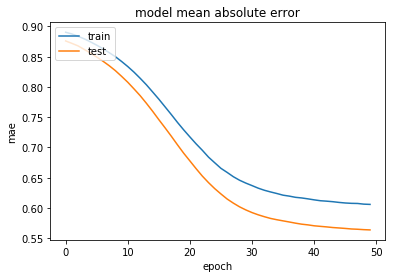

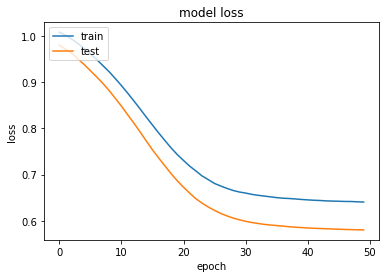

In [20]:
def visualize(history):
  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error'])
  plt.title('model mean absolute error')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
visualize(history)


In [21]:
result = model.evaluate(X_test, Y_test)
print("Mean squared error is ",result[0])
print("Mean absolute error is ",result[1])

917/917 [==============================] - 4s 5ms/step
Mean squared error is  0.5251186146535947
Mean absolute error is  0.6837513637906723


In [22]:
test = X_test[0] 

test.shape

(50, 1)

In [24]:
k = model.predict(np.array([test]))
k = k*std+mean
print("average temperature predicted for next 10 year is",k[0])

average temperature predicted for next 10 year is [20.575668 19.678143 16.05379  10.839565  9.523295  9.523295  9.523295
  9.523295  9.523295  9.794184]
